### Scikit-learn – SVM
##### Submitted by: Lance Dominic C. Raquel 

##### Part I – Importing the Dataset (5 pts.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
warnings.filterwarnings("ignore")

##### 1.) Import the Iris data by:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None) r iris = datasets.load_iris() 


In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


##### 2. Choose petal width (4th feature) and sepal width (2nd feature) as features of the data.

In [3]:
X = df.loc[:,[1,3]].values

##### 3. Print the different class labels.

In [4]:
y = df[4].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).astype(float)
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: 4, Length: 150, dtype: float64

##### Part II – Training the SVM  (5 pts.)

##### 1. Split the dataset to training data and test set with 30% test size and random state 3.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify = y)
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


##### 2. Implement the feature scaling method.

In [23]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

##### 3. Train the SVM by fitting the train data set using the SVC class and fit method from the sklearn.svm with linear Kernel, parameter C=1.0, and  random_state=3

In [24]:
svm = SVC (kernel = 'linear', C = 1.0, random_state = 3)
svm.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=3)

##### Part III – Evaluate the SVM Model  (5 pts.)

##### 1. Count the number of misclassified samples.

In [34]:
y_pred = svm.predict(X_test_std)

misclassified = (y_test !=y_pred).sum()
print('Misclassified Samples', misclassified)

Misclassified Samples 4


##### 2. Print the accuracy of the Perceptron model.

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print('Perceptron Model Accuracy', accuracy)

Perceptron Model Accuracy 0.9111111111111111


Part IV – Plotting the decision regions and the Data  (15 pts.)
1. Plot the different decision regions using Matplot. Set the sepal width (standardized) as the x-axis and the petal width (standardized) as the y-axis
2. Visualize how well the decision regions separate the different samples in the plot. Use different colors and markers for the different class types for the scatter plot of the samples.
3. Highlight the test samples by encircling them.
4. Highlight the misclassified samples in the test by encircling them with red.
5. Put a legend that labels the class types of the different shapes in the scatter plot.


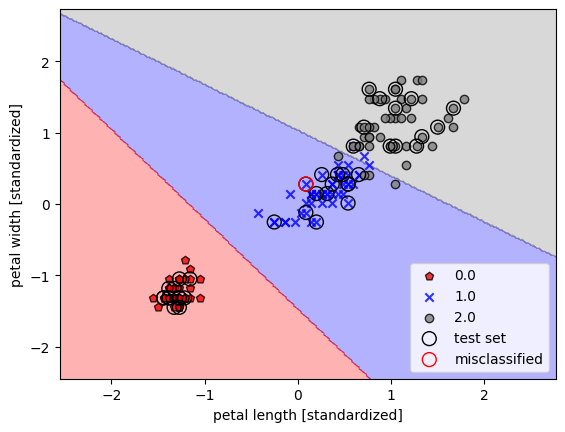

In [36]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('p', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=colors[idx], marker=markers[idx], label=cl,
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
        
    if test_idx:
        misclassified_indices = (y_test !=y_pred)
        plt.scatter(X_test[misclassified, 0], X_test[misclassified, 1], c='none', edgecolor='red',
                    alpha=1.0, linewidth=1, marker='o', s=100, label='misclassified')
        

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))


plot_decision_regions(X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(30, 70))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')


plt.legend(loc='lower right')

plt.show()